In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import re
import os
import itertools

from jitter import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
matplotlib.rcParams['figure.dpi'] = 110

In [12]:
attention_maps = pd.read_pickle('../attention-maps-beoid-with-metadata.pickle')

In [13]:
jitter_df = attention_maps.groupby(['Network', 'EBP Type']).apply(jitter)
jitter_df.reset_index(drop=True, inplace=True)
jitter_df.groupby(['Network', 'EBP Type']).describe()

Frame       Jitter     Operator  \
Network  EBP Type                                                       
Spatial  Contrastive     count  7139.000000  7139.000000  7139.000000   
                         mean     35.292198    19.823331     4.643928   
                         std      33.602660    14.273030     1.908192   
                         min       1.000000     0.000000     0.000000   
                         25%      12.000000    10.094355     4.000000   
                         50%      25.000000    15.613314     5.000000   
                         75%      46.000000    24.823943     6.000000   
                         max     199.000000   122.226311     7.000000   
         Non-Contrastive count  7139.000000  7139.000000  7139.000000   
                         mean     35.292198    18.206277     4.643928   
                         std      33.602660    10.381023     1.908192   
                         min       1.000000     0.000000     0.000000   
                         25%      12.000000    11.941697     4.000000   
                         50%      25.000000    15.821854     5.000000   
                         75%      46.000000    21.254576     6.000000   
                         max     199.000000   115.312958     7.000000   
Temporal Contrastive     count  5744.000000  5744.000000  5744.000000   
                         mean     33.649025    24.655589     4.674965   
                         std      33.537540    16.658224     1.885277   
                         min       1.000000     0.693441     0.000000   
                         25%      10.000000    13.115419     4.000000   
                         50%      22.000000    20.926140     5.000000   
                         75%      45.000000    31.852257     6.000000   
                         max     190.000000   133.818726     7.000000   
         Non-Contrastive count  5744.000000  5744.000000  5744.000000   
                         mean     33.649025    17.201856     4.674965   
                         std      33.537540    10.579121     1.885277   
                         min       1.000000     1.103449     0.000000   
                         25%      10.000000     9.969189     4.000000   
                         50%      22.000000    14.958122     5.000000   
                         75%      45.000000    21.290998     6.000000   
                         max     190.000000   103.808922     7.000000   

                                Video frame  Window Size  
Network  EBP Type                                         
Spatial  Contrastive     count  7139.000000       7139.0  
                         mean   1326.939347          1.0  
                         std    1133.393266          0.0  
                         min      80.000000          1.0  
                         25%     467.000000          1.0  
                         50%     961.000000          1.0  
                         75%    1921.500000          1.0  
                         max    5035.000000          1.0  
         Non-Contrastive count  7139.000000       7139.0  
                         mean   1326.939347          1.0  
                         std    1133.393266          0.0  
                         min      80.000000          1.0  
                         25%     467.000000          1.0  
                         50%     961.000000          1.0  
                         75%    1921.500000          1.0  
                         max    5035.000000          1.0  
Temporal Contrastive     count  5744.000000       5744.0  
                         mean   1295.282033         10.0  
                         std    1132.639911          0.0  
                         min      80.000000         10.0  
                         25%     446.000000         10.0  
                         50%     919.000000         10.0  
                         75%    1912.000000         10.0  
                         max    5026.000000         10.0  
         Non-Contrast

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


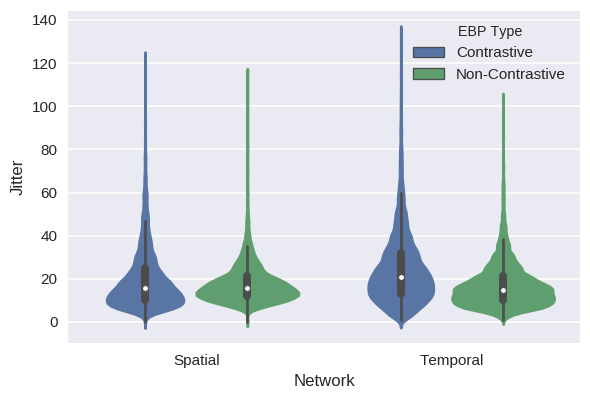

In [14]:
sns.violinplot(x='Network', y='Jitter', hue='EBP Type', data=jitter_df, bw=0.1)

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


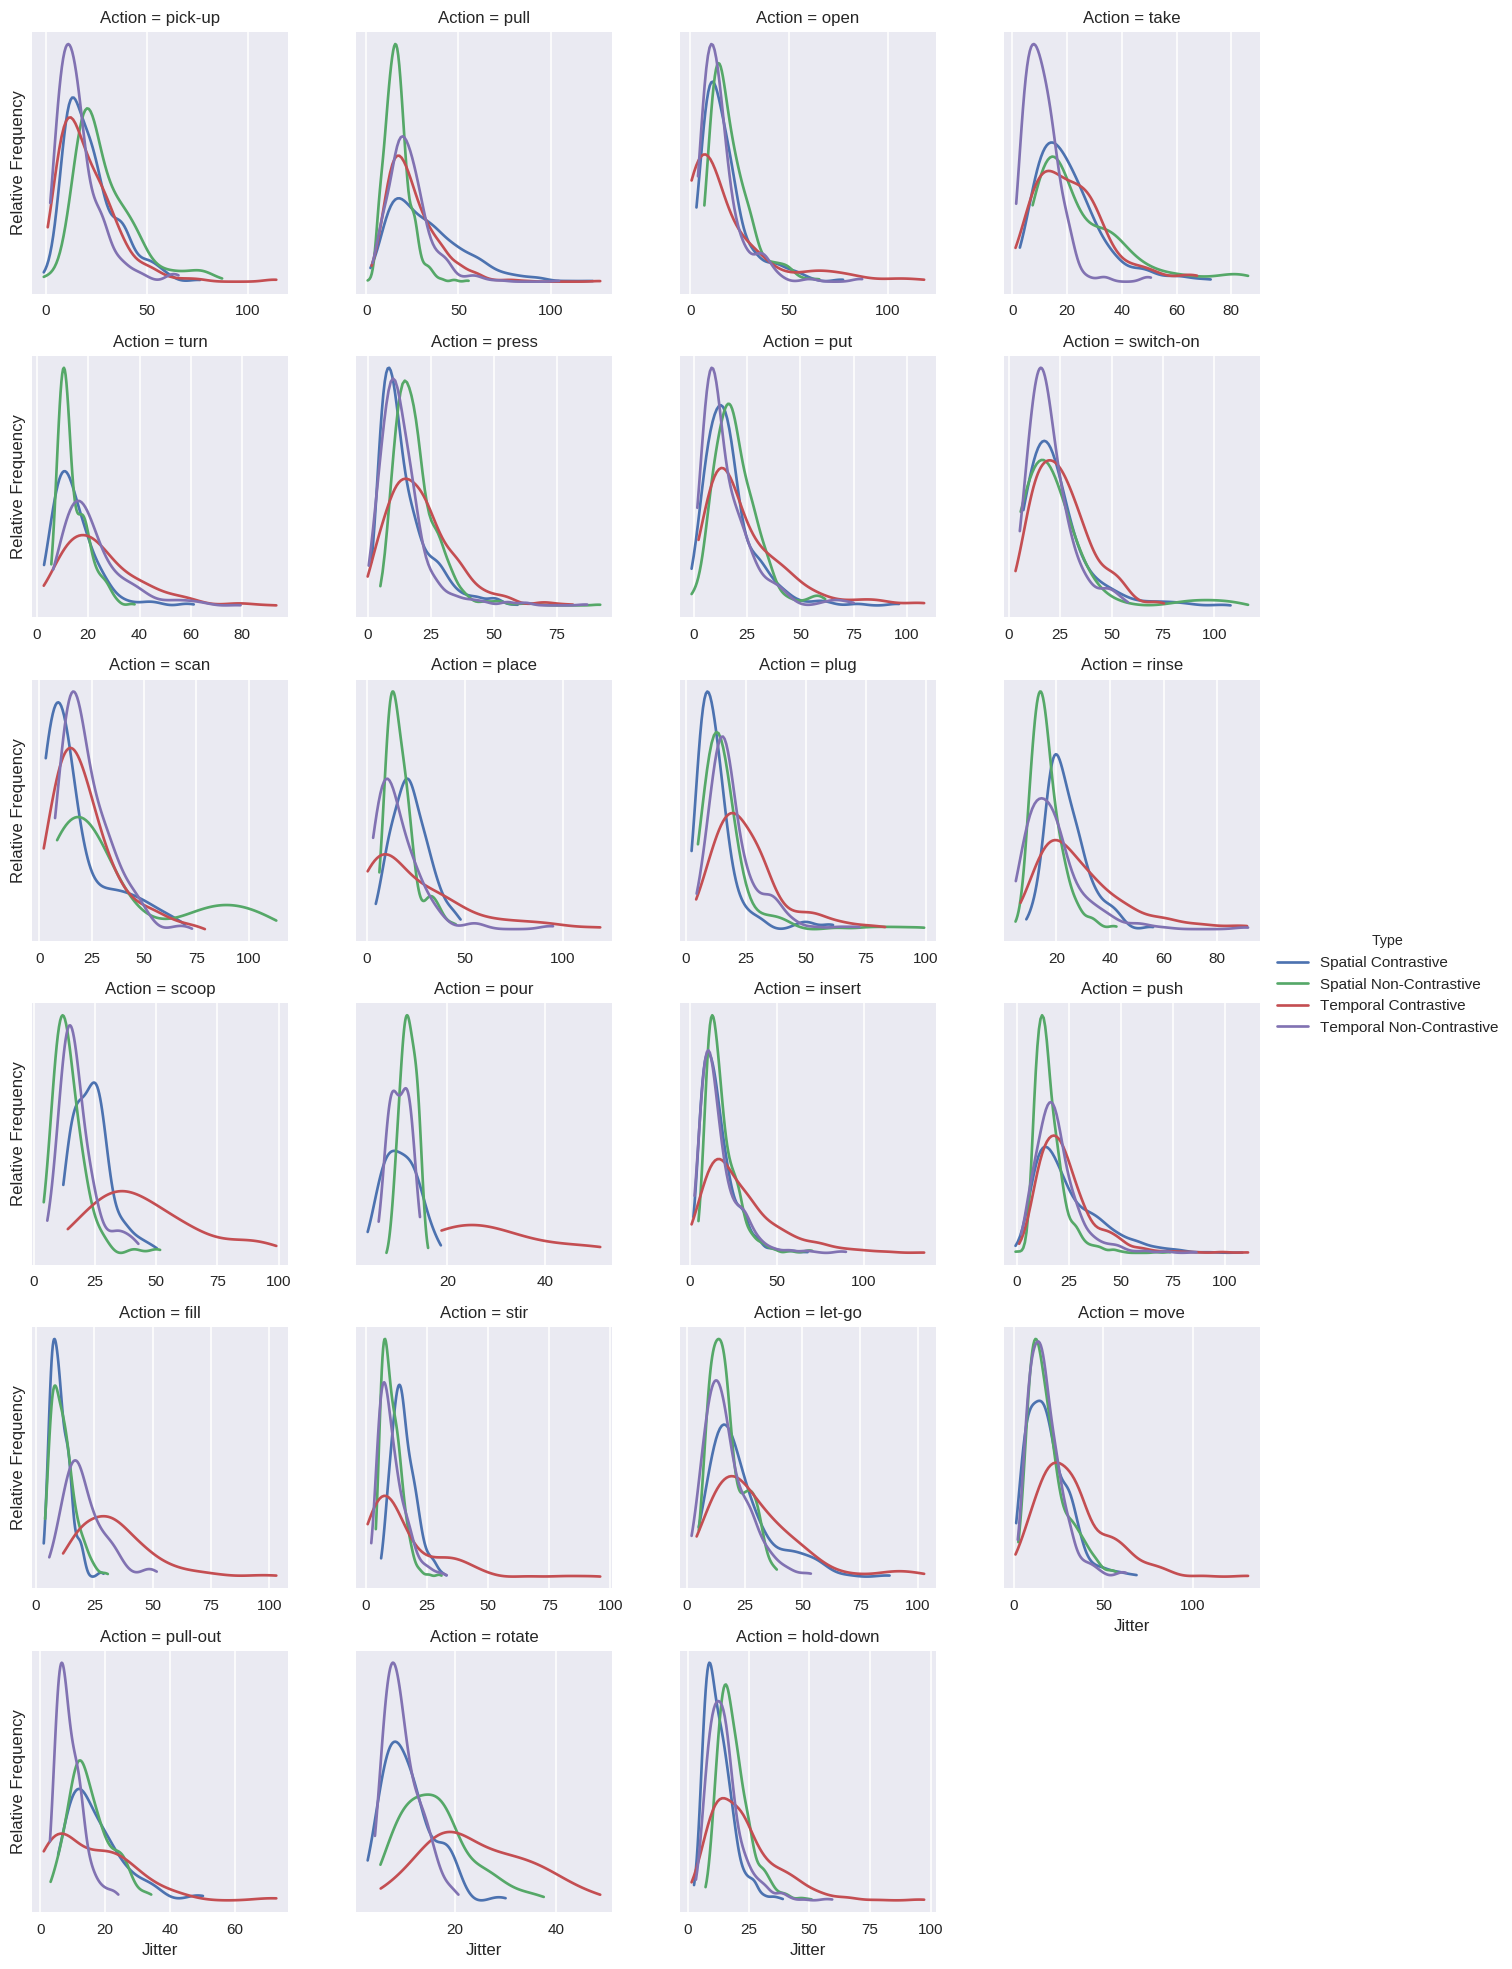

In [15]:
jitter_df['Type'] = jitter_df['Network'] + " " + jitter_df['EBP Type']
grid = sns.FacetGrid(data=jitter_df, 
                     col='Action', 
                     hue="Type",
                     col_wrap=4, 
                     sharey=False,
                     sharex=False
                     )
grid.map(sns.distplot, "Jitter", hist=False)
grid.set_ylabels("Relative Frequency")
grid.set(yticks=[])
grid.add_legend()

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


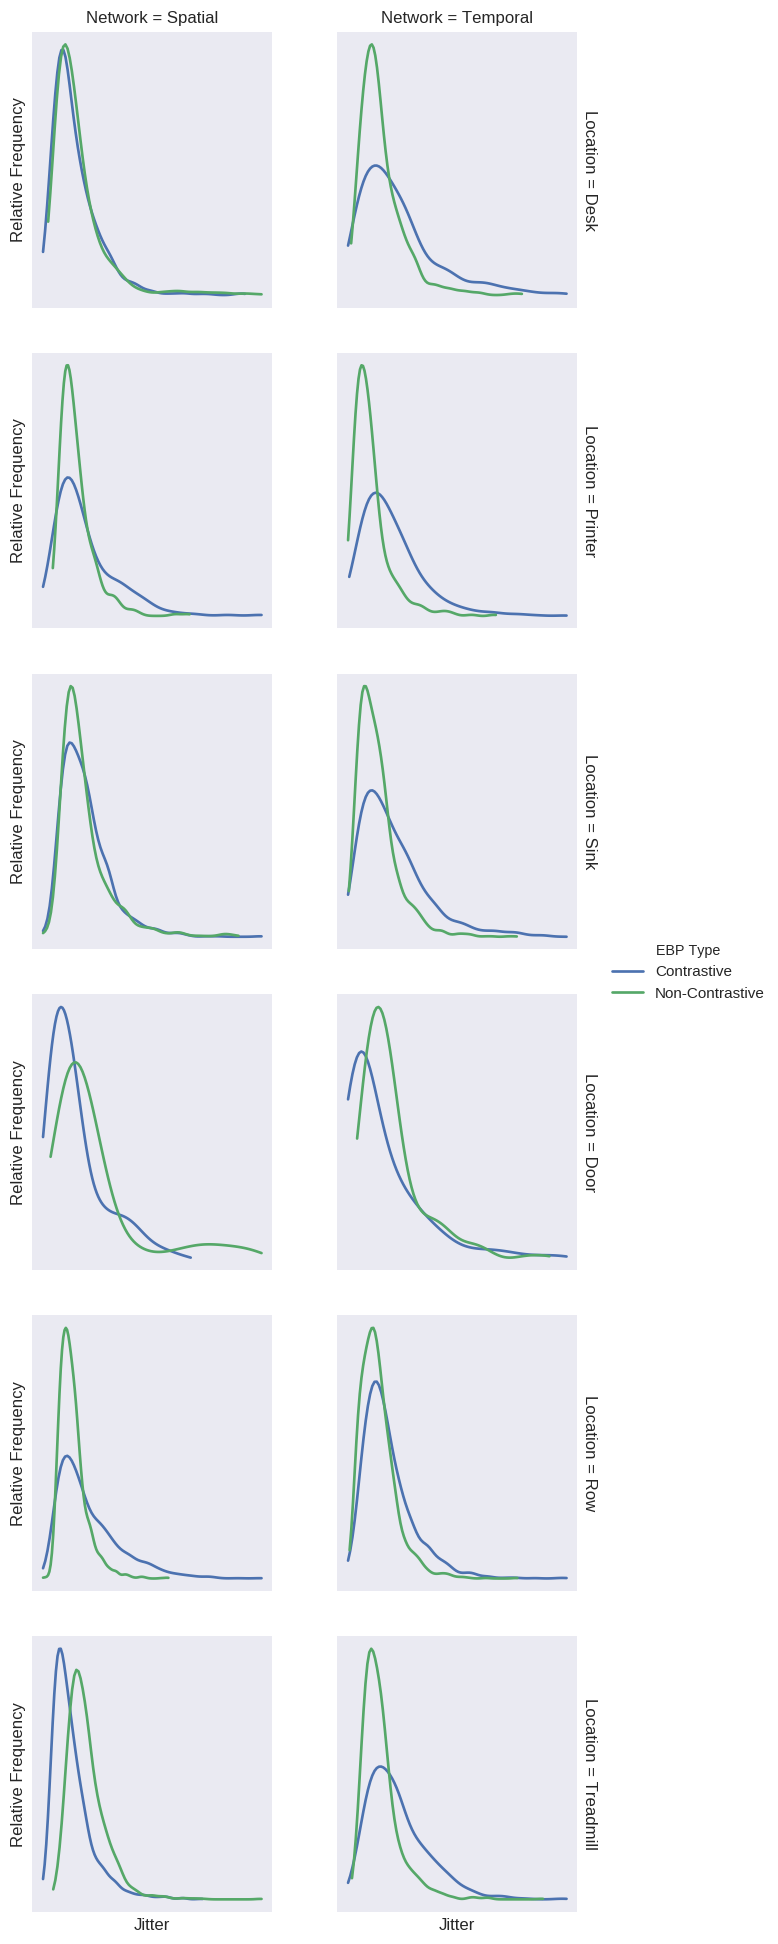

In [16]:
grid = sns.FacetGrid(data=jitter_df, 
                     col='Network',
                     row='Location', 
                     hue='EBP Type',
                     sharey=False,
                     sharex=False,
                     margin_titles=True
                     )
grid.map(sns.distplot, "Jitter", hist=False)
grid.add_legend()
grid.set_xlabels("Jitter")
grid.set(yticks=[], xticks=[])
grid.set_ylabels("Relative Frequency")